In [1]:
# Necessary because jupyter restricts relative imports from parent directories
import os
if os.getcwd().split('/')[-1] != 'tcav':
    print(os.getcwd())
    os.chdir('../')
    os.chdir('../')
    os.chdir('../')    
    print(os.getcwd())

/code/tcav/tcav_examples/discrete
/code


In [2]:
from tensorflow.io import gfile
from tcav.tcav_examples.discrete.kdd99_activation_generator import KDD99DiscreteActivationGenerator
from tcav.utils import create_session
from tcav.tcav_examples.discrete.kdd99_model_wrapper import KDD99KerasModelWrapper


In [3]:
# Make source directory, 
source_dir = "./tcav/tcav_examples/discrete/kdd_sanity2"
working_dir = source_dir
acts_dir = os.path.join(working_dir, "activations")
gfile.makedirs(acts_dir)
cav_dir = os.path.join(working_dir, "cav")
gfile.makedirs(cav_dir)


In [4]:
# Make data
! python ./tcav/tcav_examples/discrete/make_kdd99_concepts.py --source_dir={source_dir}


2021-04-04 18:10:46.690944: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
[[0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 ...
 [0 b'tcp' b'http' ... 0.01 0.0 0.0]
 [0 b'tcp' b'http' ... 0.01 0.0 0.0]
 [0 b'tcp' b'http' ... 0.01 0.0 0.0]]
[b'normal.' b'normal.' b'normal.' ... b'normal.' b'normal.' b'normal.']
Available concepts for KDD99 dataset are: 
['srv_count', 'root_shell', 'num_comp']


Available targets for KDD99 dataset are: 
[b'normal.' b'buffer_overflow.' b'loadmodule.' b'perl.' b'neptune.'
 b'smurf.' b'guess_passwd.' b'pod.' b'teardrop.' b'portsweep.' b'ipsweep.'
 b'land.' b'ftp_write.' b'back.' b'imap.' b'satan.' b'phf.' b'nmap.'
 b'multihop.' b'warezmaster.' b'warezclient.' b'spy.' b'rootkit.']


Created 10 random folders 

Successfully created data at ./tcav/tcav_examples/discrete/kdd_sanity2


In [5]:
# Create models
label_path = os.path.join(source_dir, "labels.txt")
model_path = os.path.join(source_dir, "kdd99_2.h5")
uci_model = KDD99KerasModelWrapper(create_session(), model_path, label_path)



In [6]:
# Create activation generator
act_gen = KDD99DiscreteActivationGenerator(model=uci_model, source_dir=source_dir, acts_dir=acts_dir, max_examples=200)

In [7]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(3)

target = "normal."
bottlenecks = ["dense", "dense_1" ]
#concepts = ['srcportrate_less', 'srcportrate_more', 'serror_rate_less', 'serror_rate_more', 'host_more', 'host_less']
concepts = ['srv_count', 'root_shell','num_comp']
alphas = [0.01]



my_tcav = TCAV(create_session,
                   target,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)


results = my_tcav.run(run_parallel=False)


INFO:tensorflow:dense ['srv_count', 'random500_0'] normal. 0.01
INFO:tensorflow:dense ['srv_count', 'random500_1'] normal. 0.01
INFO:tensorflow:dense ['srv_count', 'random500_2'] normal. 0.01
INFO:tensorflow:dense ['srv_count', 'random500_3'] normal. 0.01
INFO:tensorflow:dense ['srv_count', 'random500_4'] normal. 0.01
INFO:tensorflow:dense ['srv_count', 'random500_5'] normal. 0.01
INFO:tensorflow:dense ['srv_count', 'random500_6'] normal. 0.01
INFO:tensorflow:dense ['srv_count', 'random500_7'] normal. 0.01
INFO:tensorflow:dense ['srv_count', 'random500_8'] normal. 0.01
INFO:tensorflow:dense ['srv_count', 'random500_9'] normal. 0.01
INFO:tensorflow:dense ['root_shell', 'random500_0'] normal. 0.01
INFO:tensorflow:dense ['root_shell', 'random500_1'] normal. 0.01
INFO:tensorflow:dense ['root_shell', 'random500_2'] normal. 0.01
INFO:tensorflow:dense ['root_shell', 'random500_3'] normal. 0.01
INFO:tensorflow:dense ['root_shell', 'random500_4'] normal. 0.01
INFO:tensorflow:dense ['root_shell'

Class = normal.
  Concept = srv_count
    Bottleneck = dense. TCAV Score = 2000.56 (+- 1059.90), random was 1188.10 (+- 2533.56). p-val = 0.323 (not significant)
    Bottleneck = dense_1. TCAV Score = 16.37 (+- 4.25), random was 12.38 (+- 22.52). p-val = 0.581 (not significant)
  Concept = root_shell
    Bottleneck = dense. TCAV Score = 3626.80 (+- 6134.39), random was 1188.10 (+- 2533.56). p-val = 0.021 (significant)
    Bottleneck = dense_1. TCAV Score = 27.95 (+- 59.96), random was 12.38 (+- 22.52). p-val = 0.109 (not significant)
  Concept = num_comp
    Bottleneck = dense. TCAV Score = 9094.30 (+- 16383.73), random was 1188.10 (+- 2533.56). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 73.18 (+- 162.24), random was 12.38 (+- 22.52). p-val = 0.002 (significant)
{'dense': {'bn_vals': [0.01, 3626.7985657403224, 9094.298326221005], 'bn_stds': [0, 6134.392221560342, 16383.72960501791], 'significant': [False, True, True]}, 'dense_1': {'bn_vals': [0.01, 0.01, 73.1781

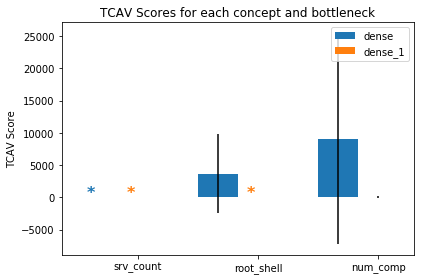

In [8]:
utils_plot.plot_results(results, num_random_exp=10)

